https://www.perplexity.ai/search/i-want-to-take-one-dataset-in-3Uqe3SmPR8al9Ya0C_7DBg#2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mistr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mistr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mistr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

DataSet:- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mistr\.cache\kagglehub\datasets\lakshmi25npathi\imdb-dataset-of-50k-movie-reviews\versions\1


In [5]:
# load Dataset

df = pd.read_csv("IMDB Dataset.csv")

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
# Check missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
# Sentiment distribution
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


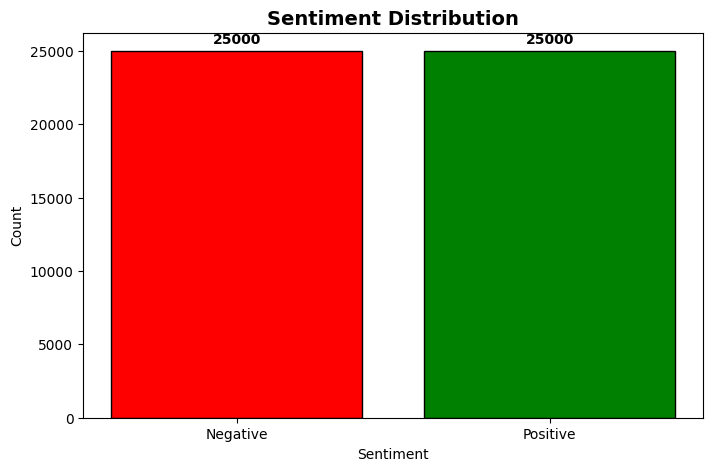

In [11]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts = df['sentiment'].value_counts()

plt.bar(['Negative', 'Positive'], sentiment_counts.values,
        color=['red', 'green'], edgecolor='black')

for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.title('Sentiment Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [12]:
# review length analysis
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

print(f"Average Review Length: {df['review_length'].mean():.0f} characters")
print(f"Average Word Count: {df['word_count'].mean():.0f} words")

Average Review Length: 1309 characters
Average Word Count: 231 words


In [13]:
import re

In [14]:
# Text Preprocessing

def preprocessing(text):
    """Clean and preprocess text"""
    # lowercase
    text = text.lower()

    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # remove URL
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove special characters (keep only letters)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [15]:
# Apply preprocessing

print("Preprocessing Text data....")
df['cleaned_review'] = df['review'].apply(preprocessing)
print("Text Preprocessing Completed. :)")

Preprocessing Text data....
Text Preprocessing Completed. :)


In [16]:
# Check before and after
print("ORIGINAL:")
print(df['review'].iloc[0][:200])

print("\nCLEANED:")
print(df['cleaned_review'].iloc[0][:200])


ORIGINAL:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo

CLEANED:
one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brut


In [17]:
# Encode Target Variable
# Convert sentiment to numeric: positive=1, negative=0

df['sentiment_label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

print("Sentiment Encoding: ")
print(df[['sentiment', 'sentiment_label']].head())

Sentiment Encoding: 
  sentiment  sentiment_label
0  positive                1
1  positive                1
2  positive                1
3  negative                0
4  positive                1


In [18]:
# Train-Test Split
X = df["cleaned_review"]
y = df['sentiment_label']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [22]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"\nTrain positive: {y_train.sum()}")
print(f"Train negative: {len(y_train) - y_train.sum()}")

Training samples: 40000
Testing samples: 10000

Train positive: 20000
Train negative: 20000


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.8,
    ngram_range=(1,2),
    sublinear_tf=True
)

print("TF-IDF Configuration:")
print(f"  • max_features: {tfidf.max_features}")
print(f"  • ngram_range: {tfidf.ngram_range}")
print(f"  • min_df: {tfidf.min_df}")
print(f"  • max_df: {tfidf.max_df}")


TF-IDF Configuration:
  • max_features: 5000
  • ngram_range: (1, 2)
  • min_df: 5
  • max_df: 0.8


# Build ML Pipeline


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [27]:
# Create pipeline: TF-IDF + Logistic Regression

pipeline = Pipeline([
    ('tfidf', tfidf),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

print("Pipeline Steps:")
print("  1. TF-IDF Vectorization")
print("  2. Logistic Regression")

Pipeline Steps:
  1. TF-IDF Vectorization
  2. Logistic Regression


In [28]:
# Train Default Model
print("Traning Model....")
pipeline.fit(X_train, y_train)
print("Training Completed..")

Traning Model....
Training Completed..


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [38]:
# Evaluate Default Model

y_pred_default = pipeline.predict(X_test)
y_pred_proba_default = pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
acc_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)


In [39]:
print("--- Default Model Performance ---")
print(f"Accuracy:  {acc_default:.4f} ({acc_default*100:.1f}%)")
print(f"Precision: {precision_default:.4f}")
print(f"Recall:    {recall_default:.4f}")
print(f"F1-Score:  {f1_default:.4f}")
print(f"ROC-AUC:   {roc_auc_default:.4f}")

--- Default Model Performance ---
Accuracy:  0.8936 (89.4%)
Precision: 0.8905
Recall:    0.8976
F1-Score:  0.8940
ROC-AUC:   0.9615


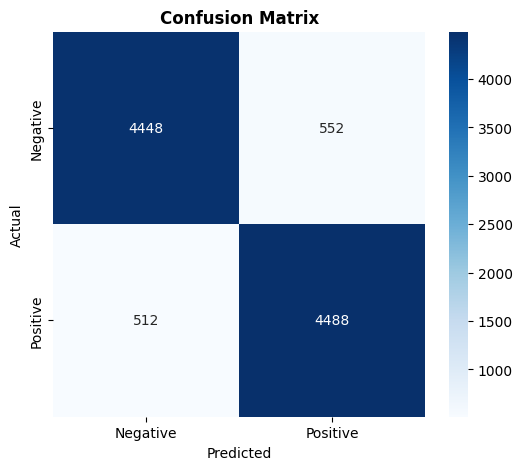


True Negatives:  4448
False Positives: 552
False Negatives: 512
True Positives:  4488


In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")


In [41]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default, 
                          target_names=['Negative', 'Positive']))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89      5000
    Positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [42]:
import pickle

In [ ]:
# Save the Model
import pickle

with open("model/sentiment_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Model saved as 'model/sentiment_model.pkl'")

Model saved as 'sentiment_model.pkl'


In [49]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predictions
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8936
ROC-AUC: 0.96150756


In [ ]:
# Save model metadata
metadata = {
    "model": "Logistic Regression + TF-IDF",
    "dataset": "IMDb 50K Reviews",
    "accuracy": round(float(acc), 4),
    "roc_auc": round(float(roc_auc), 4),
    "training_samples": len(X_train),
    "testing_samples": len(X_test)
}

import json
with open("model/model_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print("✓ Metadata saved as 'model/model_metadata.json'")

✓ Metadata saved as 'model_metadata.json'


In [55]:
print("=" * 60)
print("        SENTIMENT ANALYSIS MODEL - FINAL REPORT")
print("=" * 60)

print(f"\nDataset: IMDb 50K Movie Reviews")
print(f"Training Samples: {len(X_train):,}")
print(f"Testing Samples:  {len(X_test):,}")

print(f"\nModel Performance:")
print(f"  • Accuracy:  {acc * 100:.2f}%")
print(f"  • Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  • Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"  • F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"  • ROC-AUC:   {roc_auc:.4f}")

print(f"\n✅ Model ready for FastAPI deployment!")
print("=" * 60)


        SENTIMENT ANALYSIS MODEL - FINAL REPORT

Dataset: IMDb 50K Movie Reviews
Training Samples: 40,000
Testing Samples:  10,000

Model Performance:
  • Accuracy:  89.36%
  • Precision: 0.8905
  • Recall:    0.8976
  • F1-Score:  0.8940
  • ROC-AUC:   0.9615

✅ Model ready for FastAPI deployment!
